In [528]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from src.EnhancementUtils import EnhancementUtils

utils = EnhancementUtils()
#img = cv2.imread('C:\\Users\\lucre\\Downloads\\Telegram Desktop\\photo_2021-10-31_21-54-59.jpg')
img = cv2.imread('../dataset/utk/images/38_1_1_20170116223044761.jpg.chip.jpg')

In [529]:
def fun(img):
    y, cr, cb = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb))
    y_inv = 255 - y
    bilateral = cv2.bilateralFilter(y_inv, d=2, sigmaColor=25, sigmaSpace=25)
    y = np.array(y).astype(np.int16)  # otherwise np does subtraction in modulo 256
    bilateral = np.array(bilateral).astype(np.int16)

    if np.mean(img) < 60 or np.mean(img) > 190:
        alpha_adaptive = 2*y/127
        beta_adaptive = y/255 + 0.5
    else:
        alpha_adaptive = y/127
        beta_adaptive = 1

    enhanced = 255 * ((y / 255) ** (beta_adaptive*np.power(alpha_adaptive, ((128 - bilateral) / 128))))
    enhanced = enhanced.astype('uint8')
    img_enhanced = cv2.merge([enhanced, cr, cb])
    return img_enhanced

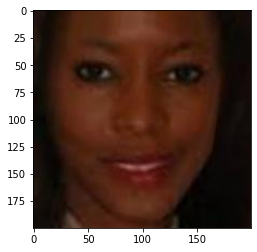

In [530]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

C:\Users\lucre\AppData\Local\Temp/ipykernel_13552/2979364485.py:15: RuntimeWarning: divide by zero encountered in power
  enhanced = 255 * ((y / 255) ** (beta_adaptive*np.power(alpha_adaptive, ((128 - bilateral) / 128))))


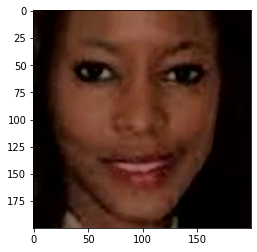

In [531]:
plt.imshow(cv2.cvtColor(fun(img), cv2.COLOR_YCrCb2RGB))

In [532]:
np.mean(img)

35.61141666666666

In [ ]:
cv2.imwrite('under.jpg', cv2.cvtColor(fun(img), cv2.COLOR_YCrCb2BGR))